In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(183, 275, 3)


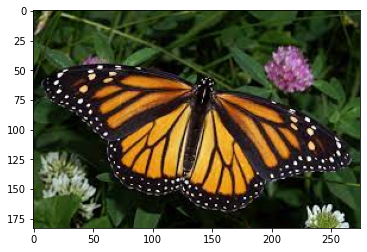

In [5]:
# load image
img = cv2.imread('monarch.jpeg')
print(img.shape)

# change color to RGB
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [6]:
print(image)

[[[21 52  8]
  [44 75 31]
  [47 73 34]
  ...
  [24 48 16]
  [27 45 19]
  [27 45 19]]

 [[35 66 24]
  [30 58 17]
  [21 47  8]
  ...
  [32 56 24]
  [35 54 26]
  [35 53 27]]

 [[38 66 26]
  [35 63 23]
  [22 48 11]
  ...
  [40 64 32]
  [42 63 32]
  [42 62 34]]

 ...

 [[45 77 14]
  [46 77 17]
  [47 78 19]
  ...
  [28 52 20]
  [30 61 20]
  [37 68 27]]

 [[52 84 21]
  [53 84 24]
  [53 84 25]
  ...
  [26 50 18]
  [28 59 18]
  [35 66 25]]

 [[53 85 22]
  [55 86 26]
  [56 87 28]
  ...
  [20 44 12]
  [22 53 12]
  [29 60 19]]]


In [8]:
# reshaping the image into a 20 array of pisex and 3 colors values
pixel_vals = image.reshape((-1,3))
print(pixel_vals)

# convert to float type
pixel_vals = np.float32(pixel_vals)
print(pixel_vals)

[[21 52  8]
 [44 75 31]
 [47 73 34]
 ...
 [20 44 12]
 [22 53 12]
 [29 60 19]]
[[21. 52.  8.]
 [44. 75. 31.]
 [47. 73. 34.]
 ...
 [20. 44. 12.]
 [22. 53. 12.]
 [29. 60. 19.]]


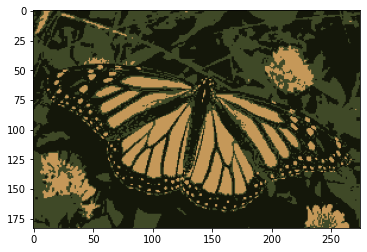

In [9]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k=3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert to 8 bit
centers = np.uint8(centers)
segemented_data = centers[labels.flatten()]

# reshape data into the original image dimention
segemented_image = segemented_data.reshape(img.shape)

plt.imshow(segemented_image)